In [1]:
# local machine only
import sys
sys.path.append('/home/bp/devel/mupif.git')

import matplotlib
# make figures larger
# matplotlib.rcParams['figure.figsize']=(20,20)

# this is ugly
# examples are not part of the mupif module now, thus are copied locally, should be re-considered
sys.path.append('.')
import models


# Simple example to illustrate

* Filed evaluateAt, vtk export, and data exchange between apps.
* Simple mesh generator on rectangular domain
* Field mapping, result in vtk


In [2]:
import mupif as mp

In [3]:
app=models.ThermalModel()
app.getApplicationSignature()

'Stationary thermal-demo-solver, ver 1.0'

In [4]:
# show the input file
print(open('inputT.in').read())

# Model edges
#     ----------3----------
#     |                   |
#     4                   2
#     |                   | 
#     ----------1---------
#
5 1 #Size x and y
10 5 #Number of elements in x and y
1 N 0. #Domain edge number 1 with boundary condition (D-Dirichlet, C-convection, other-None), prescribed temperature/ambient temperature
2 N 0.
3 N 0.
4 N 0.




In [8]:
# load some data
app.initialize(file='inputT.in')
bc = mp.ConstantProperty(propID=mp.PropertyID.PID_Temperature, valueType=mp.ValueType.Scalar, value=(20,), unit=mp.U['K'])
dbc = mp.ConstantProperty(propID=mp.PropertyID.PID_Temperature, valueType=mp.ValueType.Scalar, value=(0,), unit=mp.U['K'])

app.set(bc, 'Cauchy top')
app.set(dbc,'Dirichlet bottom')
app.set(dbc,'Dirichlet left')
app.set(dbc,'Dirichlet right')


# solve something (whatever)
app.solveStep(mp.TimeStep(time=0,dt=.1,targetTime=1.,unit=mp.U.s))

0.0 5.0 0.0 1.0


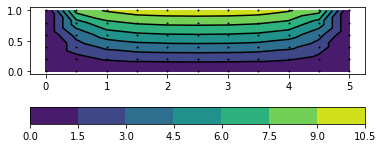

In [9]:
# show the field
f=app.getField(fieldID=mp.FieldID.FID_Temperature,time=1.*mp.Q.s)
f.plot2D()